**Week 3 – Classification Problem in MNIST**

---



# Introduction to MNIST

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

Learn more about the dataset [here](http://yann.lecun.com/exdb/mnist/).

Learn more about [OpenML](https://www.openml.org/).


In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

mnist["data"], mnist["target"]

(       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
 0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 ...       ...     ...     ...     ...  ...       ...       ...       ...       ...
 69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   

# What type of data object is MNIST?

In [2]:
# How do you know? What funtion/method would tell us the type of an object? Try describe, show, try, learn, type and see which one works!
type(mnist)

sklearn.utils.Bunch

## What is MNIST data shape/dimension?

In [3]:
#mnist.data is a numpy array
print(type(mnist.data))

#use shape to see shape of a numpy array
mnist.data.shape

<class 'pandas.core.frame.DataFrame'>


(70000, 784)

In [9]:
X, y = mnist["data"].values, mnist["target"].values
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

## Lets Visualize the image of the number - 5

In [11]:
# Define a function to plot image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,#mlp (matplotlib)
               interpolation="nearest")
    plt.axis("off")

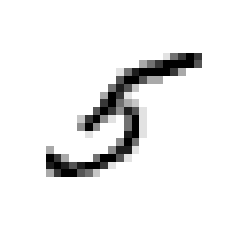

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[35] # Index can be between 0 to 69999! You can check for any index
plot_digit(some_digit)

## Lets Visualize this number further using dataset

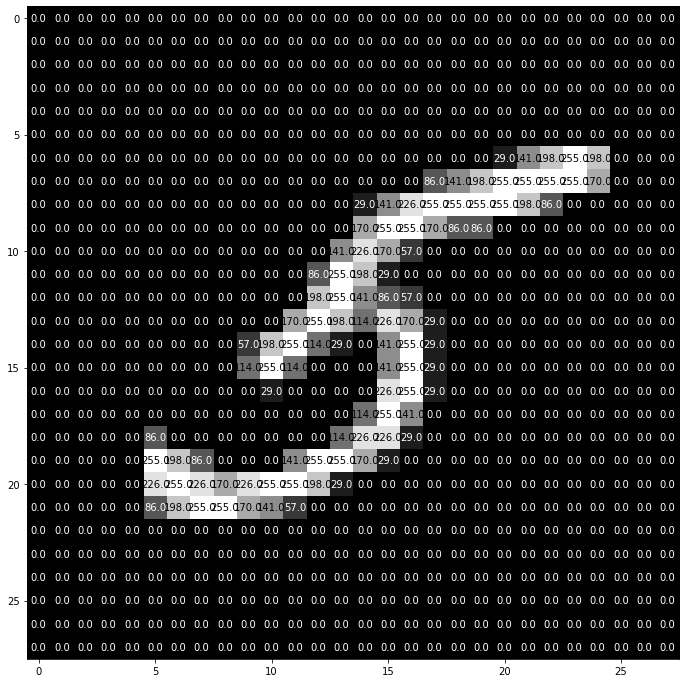

In [13]:
#Visualize 5
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X[35].reshape(28,28), ax)

# Split dataset to train and test

In [14]:
# Write a code to split your dataset into 80/20 dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

### Verify data dimension

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

# Perform Multiclass classification

### Stocastic Gradient Descent Classifier

In [20]:
#sgd stands for stochastic gradient descent (we cover it in depth in week 5)
#clf stands for classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [21]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [22]:
#decision_function(X) Evaluates the decision function for the samples in X.
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-354683.02559275,  -27633.60263185,  -69684.10005178,
        -113764.00973403, -184376.61841653,   68851.89764129,
        -476885.47969269, -589692.46151608, -244931.04489788,
        -505036.25517372]])

In [23]:
np.argmax(some_digit_scores)

5

In [24]:
# Look at number of classes for target variable (these are total number of classes)
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [25]:
sgd_clf.classes_[5]

5

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87577008, 0.88268067, 0.86794171])

In [27]:
# Cross validation score after scaling the features - Feature scaling improves the score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91101945, 0.91123373, 0.91096111])

### One vs One Classifier

In [28]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [29]:
len(ovo_clf.estimators_)

45

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [31]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

## Confusion Matrix for Multiclass classification - Stocastic Gradient Descent

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5368,    3,   17,   10,    8,   35,   42,    6,   35,    5],
       [   1, 6031,   40,   27,    7,   34,   11,    9,  117,   10],
       [  45,   33, 4985,  101,   78,   24,   94,   51,  147,   12],
       [  34,   24,  120, 5002,    3,  206,   44,   52,  132,   85],
       [  17,   24,   37,    8, 5060,    8,   53,   34,   75,  175],
       [  69,   37,   28,  181,   69, 4287,  104,   32,  177,   73],
       [  28,   19,   38,    2,   33,   84, 5279,    4,   38,    0],
       [  22,   17,   75,   32,   55,   12,    5, 5346,   17,  218],
       [  43,  134,   67,  138,   18,  131,   56,   31, 4716,  126],
       [  47,   27,   19,   81,  175,   36,    3,  161,   85, 4946]])

In [33]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

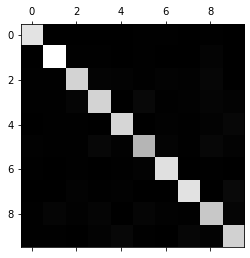

In [34]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [35]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

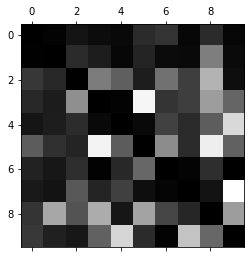

In [36]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()